In [11]:
from datasets.load import load_samples
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2

%matplotlib inline
plt.rcParams['figure.figsize'] = (15., 12.) # set default size of plots
#plt.rcParams['image.interpolation'] = 'nearest'
#plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
def draw_bbox(ax, name, box, col='r'):
    r = patches.Rectangle((box[0], box[1]), 
                          box[2] - box[0],
                          box[3] - box[1],
                          linewidth=3,
                          edgecolor=col,
                          facecolor='none')
    ax.add_patch(r)
    ax.text(box[0], box[1], name,
            bbox={'facecolor': col, 'linewidth': 0})

def draw_annotation(ax, classes):
    colors = plt.get_cmap('tab10')
    for idx, cl in enumerate(classes):
        col = colors(idx)
        for box in cl['bounds']:
            draw_bbox(ax, cl['name'], box, col)

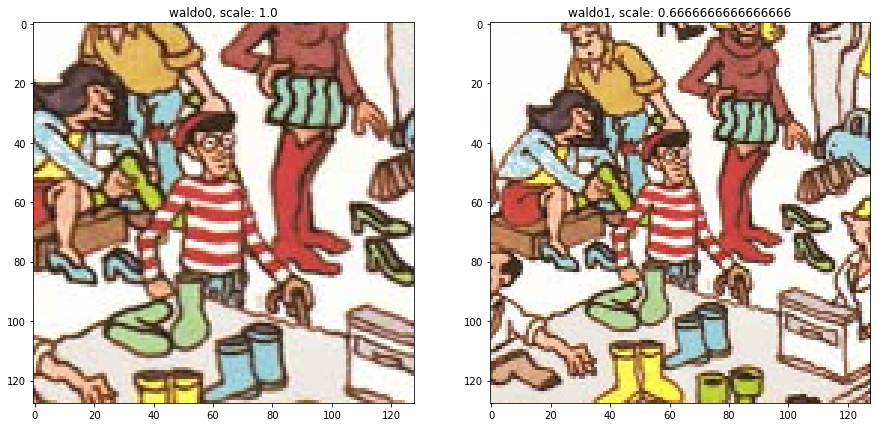

In [13]:
import pickle

waldo0_file = 'waldo1.pkl'
waldo1_file = 'waldo0.pkl'  
    
with open(waldo0_file, 'rb') as f:
    waldo0 = pickle.load(f)
with open(waldo1_file, 'rb') as f:
    waldo1 = pickle.load(f)
    
waldos = [waldo0, waldo1]

for waldo in waldos:
    #bbox = waldo['bbox']
    img = waldo['img']
    #sx, sy = bbox[2] - bbox[0], bbox[3] - bbox[1]
    #size = min(sx, sy)
    res = cv2.resize(img, dsize=(128, 128), interpolation=cv2.INTER_CUBIC)
    waldo['img'] = res
    
    
for idx, waldo in enumerate(waldos):
    ax = plt.subplot(1,2,idx +1)
    plt.imshow(waldo['img'])
    #draw_bbox(ax, waldo['name'], waldo['bbox'])
    plt.title('waldo{}, scale: {}'.format(idx, waldo['scale']))

plt.show()

(128, 128, 3)
(512,)


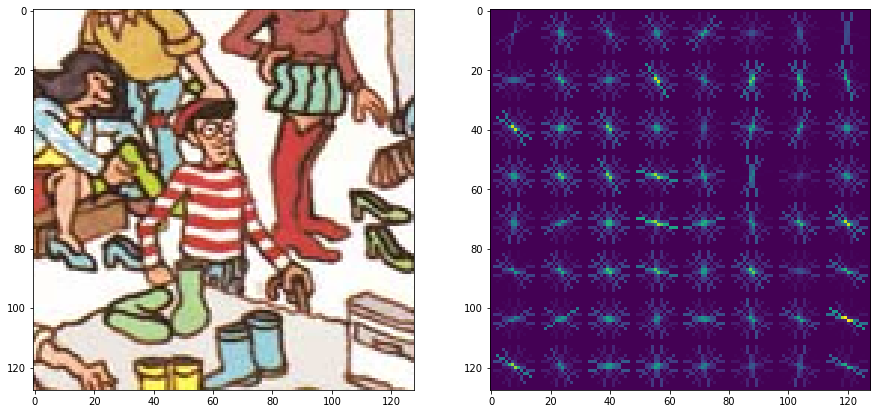

In [22]:
from skimage.feature import hog
from skimage import data, exposure

waldo = waldos[0]['img']
print(waldo.shape)

fd, hog_image = hog(waldo, orientations=8, pixels_per_cell=(16,16),
                   cells_per_block=(1,1), visualize=True, multichannel=True)
print(fd.shape)
plt.subplot(1,2,1)
plt.imshow(waldo)

plt.subplot(1,2,2)
plt.imshow(hog_image)
plt.show()

img shape (128, 128, 3)
(2048,)


TypeError: list indices must be integers or slices, not tuple

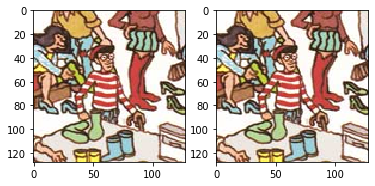

In [6]:
# adapted from https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_ml/py_svm/py_svm_opencv/py_svm_opencv.html?highlight=hog
def hog(img):
    #constants
    h, w = img.shape[:2]
    bin_n = 8
    block_size = 8
    
    img = np.float32(img) / 255.0
    dx = cv2.Sobel(img, cv2.CV_32F, 1, 0, ksize=1)
    dy = cv2.Sobel(img, cv2.CV_32F, 0, 1, ksize=1)
    mag, angle = cv2.cartToPolar(dx, dy)
    
    bins = np.int32(bin_n * angle / (2 * np.pi))
    
    hists = []
    for y in range(h // block_size):
        for x in range(w // block_size):
            b = bins[x * block_size:(x+1) * block_size, 
                     y * block_size:(y+1) * block_size]
            m = mag[x * block_size:(x+1) * block_size,
                     y * block_size: (y+1) * block_size]
            hist = np.bincount(b.ravel(), weights=m.ravel(), minlength=bin_n)
            hist = hist / np.linalg.norm(hist)
            hists.append(hist)
            
    return np.concatenate(hists)

img = waldos[0]['img']
print('img shape {}'.format(img.shape))
hog_res = hog(img)
print(hog_res.shape)

plt.subplot(1,2,1)
plt.imshow(img)

plt.subplot(1,2,2)
plt.imshow(img)

parts = [hog_res[x: x + 8] for x in range(len(hog_res / 8))]
X = []
Y = []
    
plt.quiver(X[:,0], X[:,1], np.full(16, 1), np.full(16 ,1))


plt.show()



In [ ]:
https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_ml/py_svm/py_svm_opencv/py_svm_opencv.html?highlight=hog